# Step 1: Load and Explore the Dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\SMART TECH\Desktop\AppliedNLPMaterial-master\DataSets\StudentsPerformance.csv")

# Display the first few rows
print(df.head())

# Get dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Describe numerical features
print(df.describe())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

# Step 2: Data Cleaning

In [6]:
# Check for duplicate rows
print(f"\n📌 Number of duplicate rows: {df.duplicated().sum()}")



📌 Number of duplicate rows: 0


In [8]:
# Check for inconsistent values (example for categorical columns)
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    print(f"\n🔎 Unique values in '{col}': {df[col].unique()}")


🔎 Unique values in 'gender': ['female' 'male']

🔎 Unique values in 'race/ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']

🔎 Unique values in 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

🔎 Unique values in 'lunch': ['standard' 'free/reduced']

🔎 Unique values in 'test preparation course': ['none' 'completed']


# Step 3: Outlier Detection and Handling

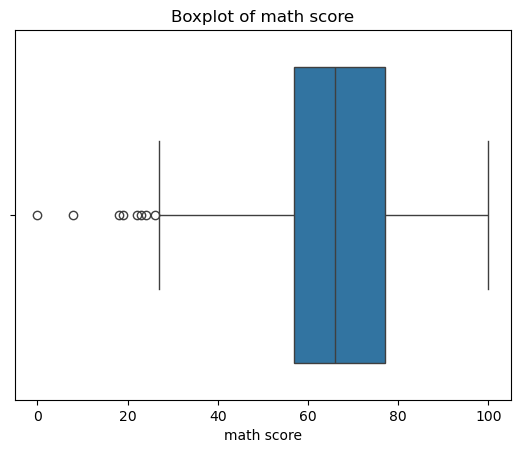

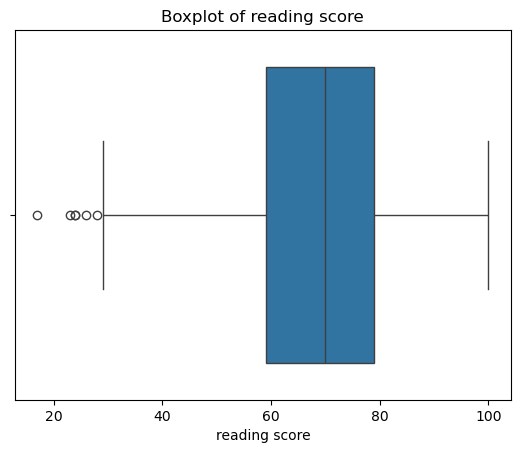

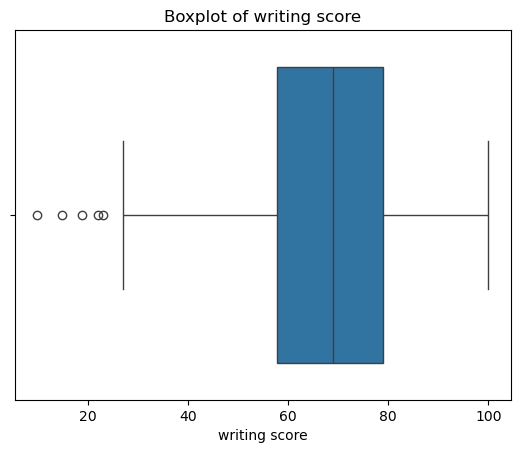

In [14]:
# Boxplots for numerical features
numerical_features = ['math score', 'reading score', 'writing score']
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [16]:
# Handling outliers using IQR
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


# Step 4: Feature Engineering

In [19]:
# Calculate average score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Create binary target variable
df['Passed'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)


# Step 5: Preprocessing

In [22]:
# Encode categorical variables and scale numerical features:

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Scale numerical features
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


 # Step 6: Model Training

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define features and target
X = df_encoded.drop(['average_score', 'Passed'], axis=1)
y = df_encoded['Passed']

X.head()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

# Step 7: Model Evaluation

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

# KNN Evaluation
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Naive Bayes Evaluation
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.97      0.99      0.98       181

    accuracy                           0.97       198
   macro avg       0.95      0.85      0.89       198
weighted avg       0.97      0.97      0.97       198

KNN Confusion Matrix:
[[ 12   5]
 [  1 180]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        17
           1       1.00      0.93      0.96       181

    accuracy                           0.93       198
   macro avg       0.78      0.96      0.84       198
weighted avg       0.96      0.93      0.94       198

Naive Bayes Confusion Matrix:
[[ 17   0]
 [ 13 168]]


 # Step 8: Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Store best scores and best cv values
best_knn_cv = None
best_knn_score = 0

best_nb_cv = None
best_nb_score = 0

# Test odd values of cv from 3 to 19 (since cv must be ≥ 2)
for cv_val in range(3, 20, 2):
    # KNN cross-validation
    knn_scores = cross_val_score(knn, X, y, cv=cv_val)
    avg_knn_score = knn_scores.mean()

    if avg_knn_score > best_knn_score:
        best_knn_score = avg_knn_score
        best_knn_cv = cv_val

    # Naive Bayes cross-validation
    nb_scores = cross_val_score(nb, X, y, cv=cv_val)
    avg_nb_score = nb_scores.mean()

    if avg_nb_score > best_nb_score:
        best_nb_score = avg_nb_score
        best_nb_cv = cv_val

# Print best results
print(f"✅ Best CV for KNN: {best_knn_cv} with average score: {best_knn_score:.4f}")
print(f"✅ Best CV for Naive Bayes: {best_nb_cv} with average score: {best_nb_score:.4f}")



✅ Best CV for KNN: 5 with average score: 0.9706
✅ Best CV for Naive Bayes: 19 with average score: 0.9402


# Step 9: Visualization

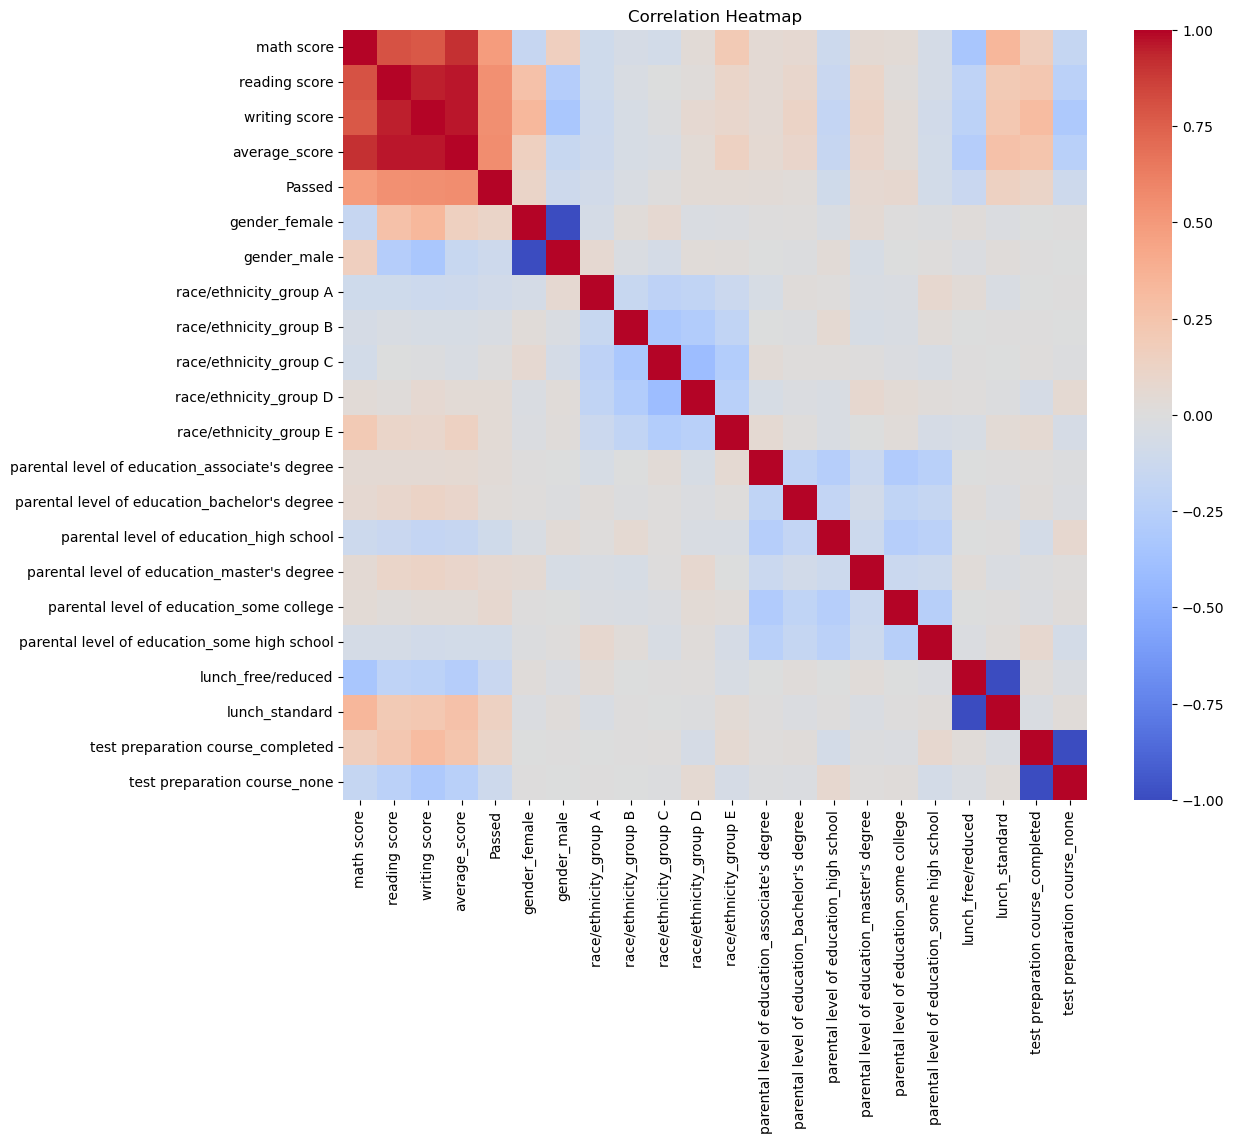

In [44]:
# Correlation heatmap
import numpy as np

plt.figure(figsize=(12,10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
